<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In [0]:
#| echo: false
#| output: asis
show_doc(Config)

---

### Config

>      Config ()

*Initialize self.  See help(type(self)) for accurate signature.*

In [ ]:
config = Config()

In [0]:
#| echo: false
#| output: asis
show_doc(URLs)

---

### URLs

>      URLs ()

*Global constants for dataset and model URLs.*

## Downloading

In [0]:
#| echo: false
#| output: asis
show_doc(download_url)

---

### download_url

>      download_url (url, dest, overwrite=False, pbar=None, show_progress=True,
>                    chunk_size=1048576, timeout=4, retries=5)

*Download `url` to `dest` unless it exists and not `overwrite`*

In [0]:
#| echo: false
#| output: asis
show_doc(download_data)

---

### download_data

>      download_data (url, fname=None, c_key='archive', force_download=False)

*Download `url` to `fname`.*

### Extract

In [0]:
#| echo: false
#| output: asis
show_doc(file_extract)

---

### file_extract

>      file_extract (fname, dest='.')

*Extract `fname` to `dest` using `tarfile` or `zipfile*

`file_extract` is used by default in `untar_data` to decompress the downloaded file.

In [ ]:
URLs.path(URLs.SHOTS_2024)

Path('/Users/ccalderon/.shot_chart/archive/shots-2024.tgz')

In [0]:
#| echo: false
#| output: asis
show_doc(untar_data)

---

### untar_data

>      untar_data (url, fname=None, dest=None, c_key='data',
>                  force_download=False, extract_func=<function file_extract>)

*Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.*

In [0]:
#| echo: false
#| output: asis
show_doc(make_df)

---

### make_df

>      make_df (path)

*Creates a pandas dataframe from `path`*

In [ ]:
shots_2021 = make_df(untar_data(URLs.SHOTS_2021))

### Using the `delegate` function from https://www.fast.ai/2019/08/06/delegation/

In [0]:
#| echo: false
#| output: asis
show_doc(delegates)

---

### delegates

>      delegates (to=None, keep=False)

*Decorator: replace `**kwargs` in signature with params from `to`*

## Creating a class - Shots

In [0]:
#| echo: false
#| output: asis
show_doc(Shots)

---

### Shots

>      Shots (dataframe)

*Plots shot chart and most/least effective shots using `plot_shots` and `plot_effective`*

In [ ]:
shots = Shots(shots_2021)

In [ ]:
shots.players

0                 Grayson Allen
1         Giannis Antetokounmpo
3                   Nic Claxton
6                  James Harden
7                   Brook Lopez
                  ...          
203149         Gabriel Lundberg
212992                Gabe York
214228               Feron Hunt
215071                Matt Ryan
216187         Arnoldas Kulboka
Name: shots_by, Length: 596, dtype: object

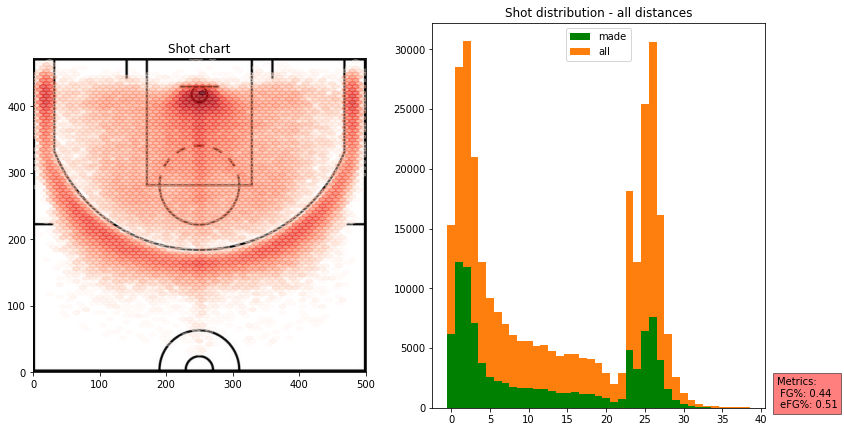

In [ ]:
shots.plot_shots()

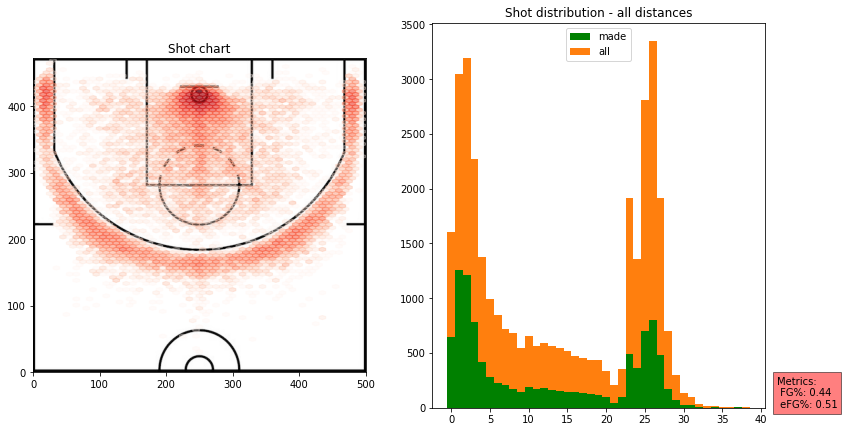

In [ ]:
shots.plot_shots(date_range=((2021,11,1), (2021,11,18)))

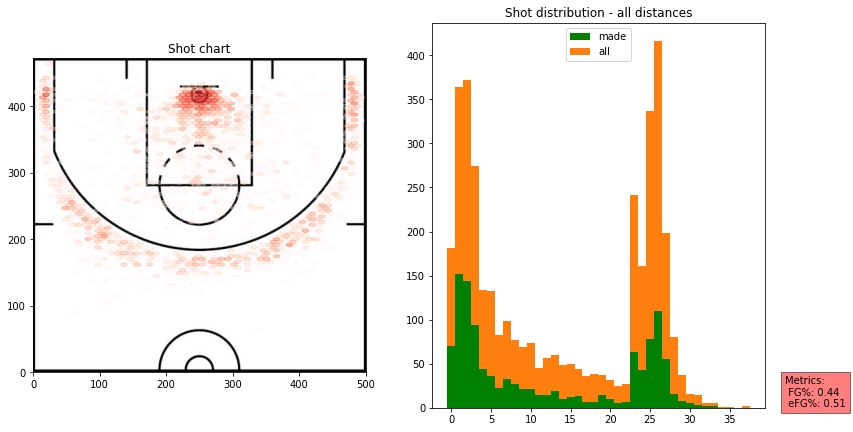

In [ ]:
shots.plot_shots(date_range=((2021,12,17), (2021,12,18)))

In [ ]:
shots.list_game_ids(2021, 11, 17)

,game_id,winner,loser
29106,202111170POR,Portland,Chicago
33398,202111170PHO,Phoenix,Dallas
33582,202111170OKC,Oklahoma City,Houston
33764,202111170NYK,Orlando,New York
33948,202111170MIN,Minnesota,Sacramento
34121,202111170MIL,Milwaukee,LA Lakers
34304,202111170MIA,Miami,New Orleans
34463,202111170DET,Detroit,Indiana
34621,202111170CHO,Charlotte,Washington
34807,202111170BRK,Brooklyn,Cleveland


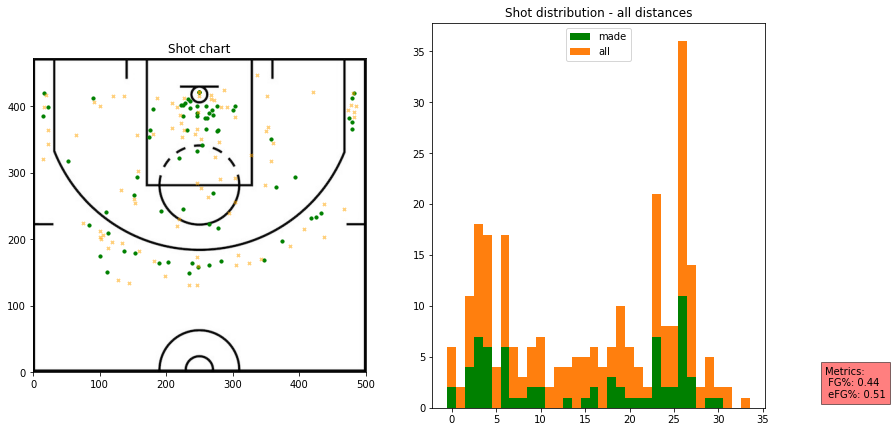

In [ ]:
shots.plot_shots(date_range="202111170PHO")

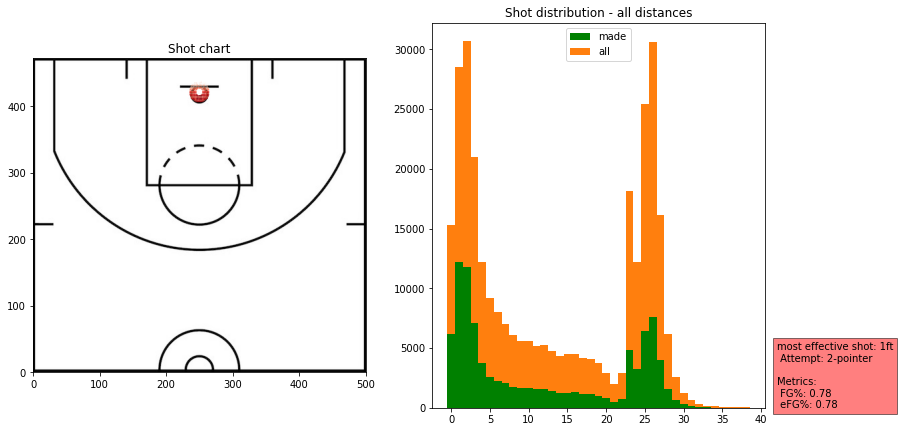

In [ ]:
shots.plot_effective(most_or_least="most", metric="efg")

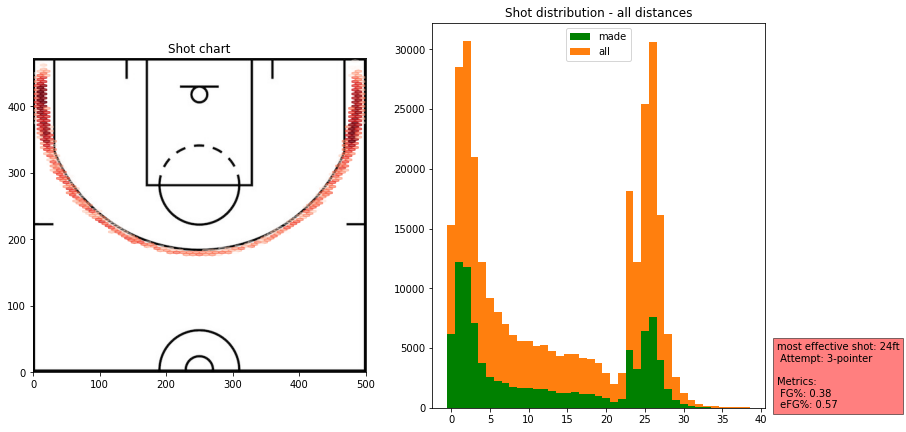

In [ ]:
shots.plot_effective(most_or_least="most", metric="efg", exclude=['0ft','1ft','2ft','23ft'])

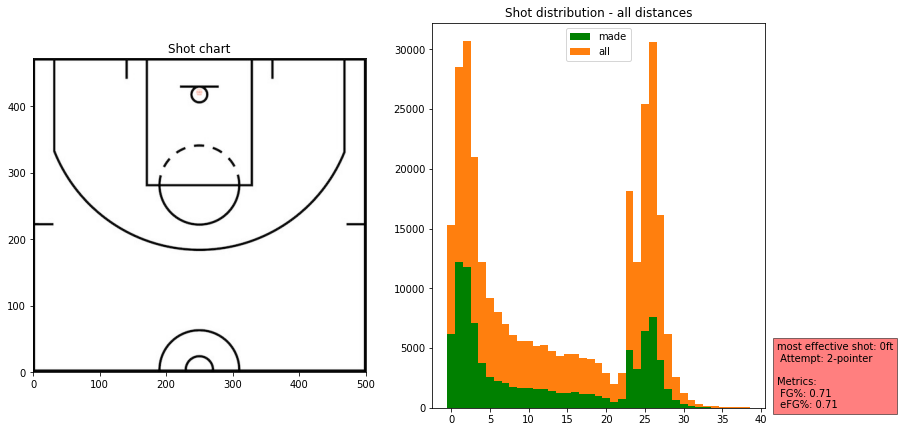

In [ ]:
shots.plot_effective(most_or_least="most", min_shots="auto",exclude=['1ft','2ft','23ft','24ft','25ft','26ft','27ft'])

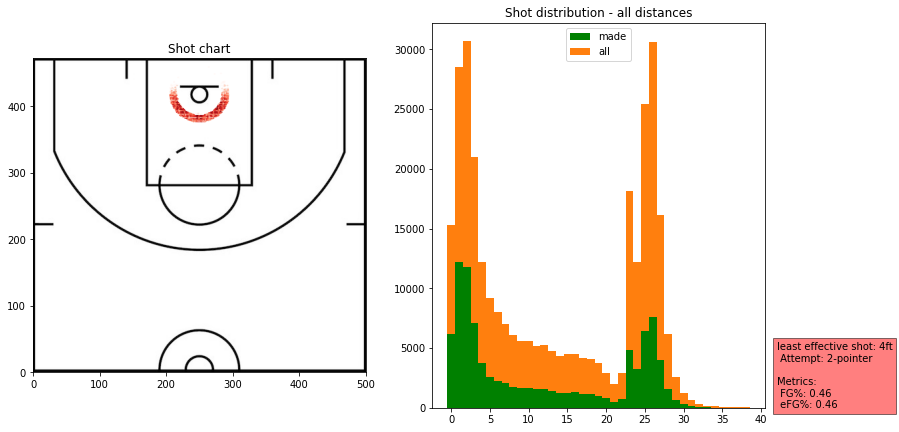

In [ ]:
shots.plot_effective(most_or_least="least", min_shots='auto',exclude=['24ft','23ft'])

## List teams

In [0]:
#| echo: false
#| output: asis
show_doc(list_teams)

---

### list_teams

>      list_teams (dataframe)

*Lists all the teams in `dataframe`*

In [ ]:
print(list_teams(shots_2021))

0          Milwaukee
3           Brooklyn
189         Oklahoma
190             Utah
371            Miami
551       Washington
552          Indiana
742           Dallas
743          Toronto
917       Sacramento
918     Golden State
1100         Chicago
1264          Denver
1608         Atlanta
1796         Orlando
1967     LA Clippers
1968        Portland
2153     New Orleans
2330       Charlotte
2511       LA Lakers
2512       Cleveland
3009         Detroit
3011    Philadelphia
3171         Houston
3351         Memphis
3538     San Antonio
3716        New York
4063         Phoenix
4788       Minnesota
5321          Boston
Name: team, dtype: object


## List unique game ids

In [0]:
#| echo: false
#| output: asis
show_doc(list_game_ids)

---

### list_game_ids

>      list_game_ids (dataframe, year, month, day)

*Lists unique game ids in `dataframe` for a given date*

In [ ]:
list_game_ids(shots_2021,2021,11,17)

,game_id,winner,loser
29106,202111170POR,Portland,Chicago
33398,202111170PHO,Phoenix,Dallas
33582,202111170OKC,Oklahoma City,Houston
33764,202111170NYK,Orlando,New York
33948,202111170MIN,Minnesota,Sacramento
34121,202111170MIL,Milwaukee,LA Lakers
34304,202111170MIA,Miami,New Orleans
34463,202111170DET,Detroit,Indiana
34621,202111170CHO,Charlotte,Washington
34807,202111170BRK,Brooklyn,Cleveland


## Inheriting from Shots to create TeamShots

In [0]:
#| echo: false
#| output: asis
show_doc(TeamShots)

---

### TeamShots

>      TeamShots (dataframe, team)

*Team shots*

In [ ]:
team_shots = TeamShots(shots_2021,"Portland")

In [ ]:
team_shots.team

'Portland'

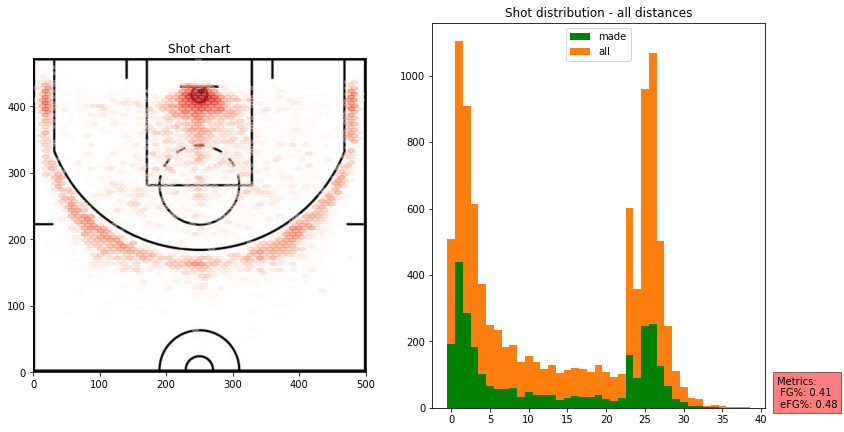

In [ ]:
team_shots.plot_shots()

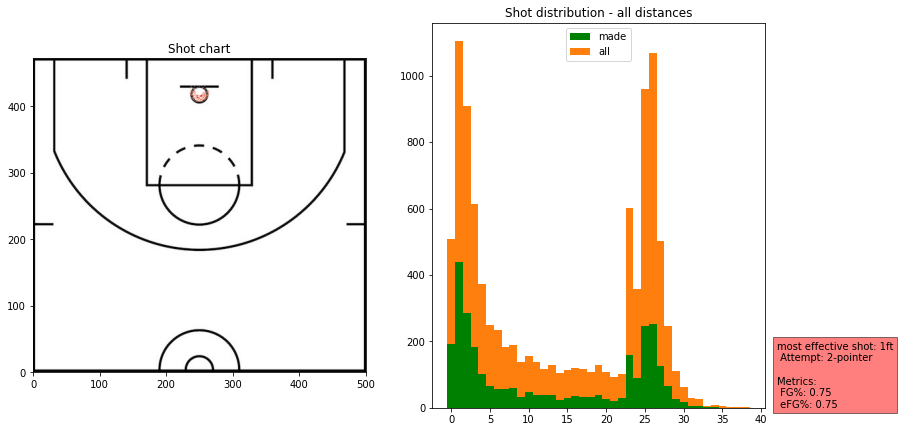

In [ ]:
team_shots.plot_effective()

In [ ]:
team_shots.dataframe.loc[(team_shots.dataframe['distance']=='24ft') & (team_shots.dataframe['attempt']=='2-pointer')]

,Unnamed: 0,game_id,year,month,day,winner,loser,x,y,play,time_remaining,quarter,shots_by,outcome,attempt,distance,team,winner_score,loser_score
103047,102971,202201130DEN,2022,1,13,Denver,Portland,268px,256px,"4th quarter, 3:41.0 remaining<br>Tony Snell ma...",3:41.0,4,Tony Snell,made,2-pointer,24ft,Portland,128,99
185595,185678,202203280POR,2022,3,28,Oklahoma City,Portland,261px,312px,"1st quarter, 7:36.0 remaining<br>Keon Johnson ...",7:36.0,1,Keon Johnson,missed,2-pointer,24ft,Portland,11,12


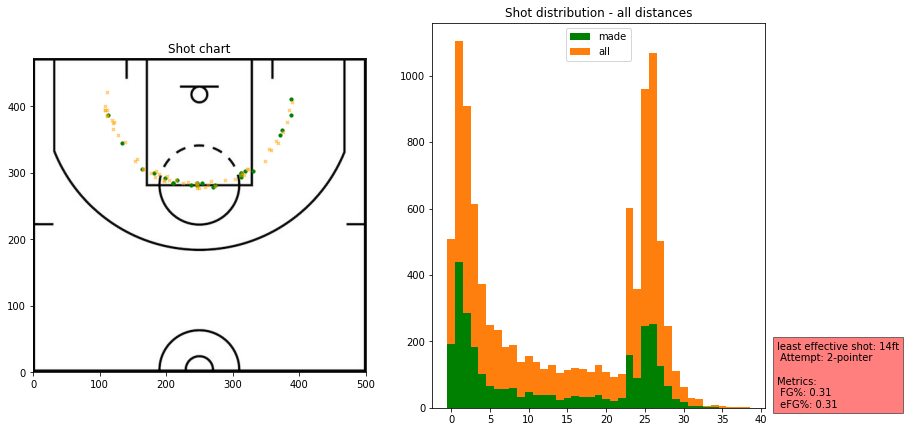

In [ ]:
team_shots.plot_effective(most_or_least="least")

In [ ]:
team_shots = TeamShots(shots_2021,"Houston")

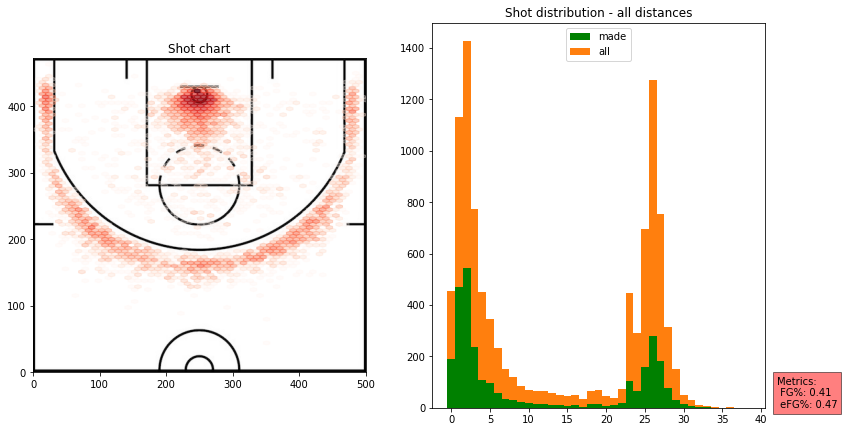

In [ ]:
team_shots.plot_shots()

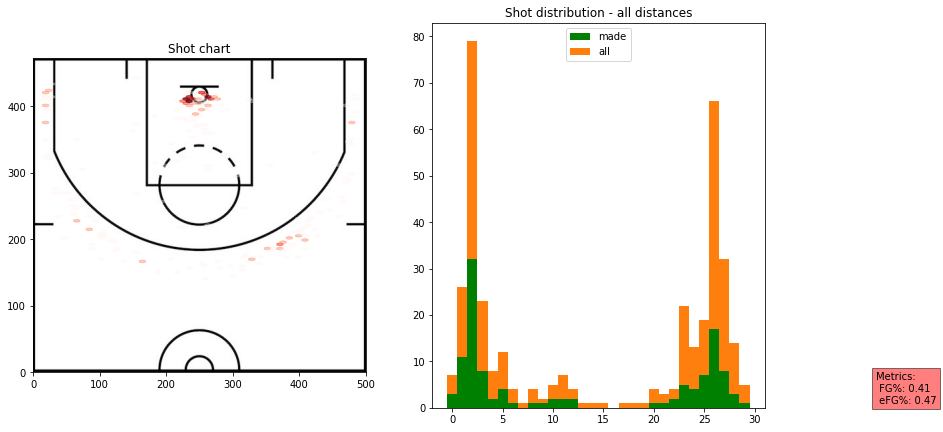

In [ ]:
team_shots.plot_shots(date_range=((2021,12,3), (2021,12,8)))

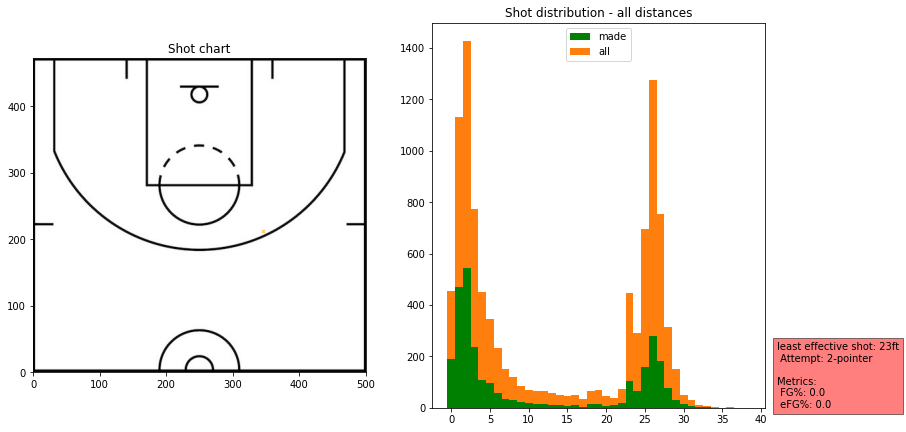

In [ ]:
team_shots.plot_effective("least")

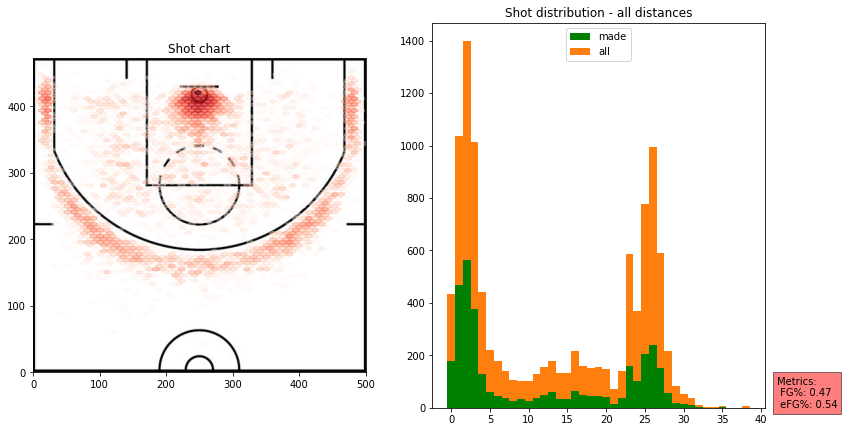

In [ ]:
team_shots = TeamShots(shots_2021,"LA Lakers")
team_shots.plot_shots()

## List players who took shots for a team

In [0]:
#| echo: false
#| output: asis
show_doc(list_team_players)

---

### list_team_players

>      list_team_players (dataframe, team)

*Lists the players in `dataframe` who took shots for a `team`*

In [ ]:
list_team_players(shots_2021,'LA Lakers')

,shots_by,count
18,Russell Westbrook,1233
13,LeBron James,1221
15,Malik Monk,824
3,Carmelo Anthony,723
0,Anthony Davis,695
21,Talen Horton-Tucker,537
2,Avery Bradley,349
1,Austin Reaves,315
20,Stanley Johnson,251
23,Wayne Ellington,237


## Inheriting from Shots to create PlayerShots

In [0]:
#| echo: false
#| output: asis
show_doc(PlayerShots)

---

### PlayerShots

>      PlayerShots (dataframe, player)

*Player shots*

In [ ]:
player_shots = PlayerShots(shots_2021,"Kevin Durant")

In [ ]:
player_shots.fg_pct

0.52

In [ ]:
player_shots.efg_pct

0.57

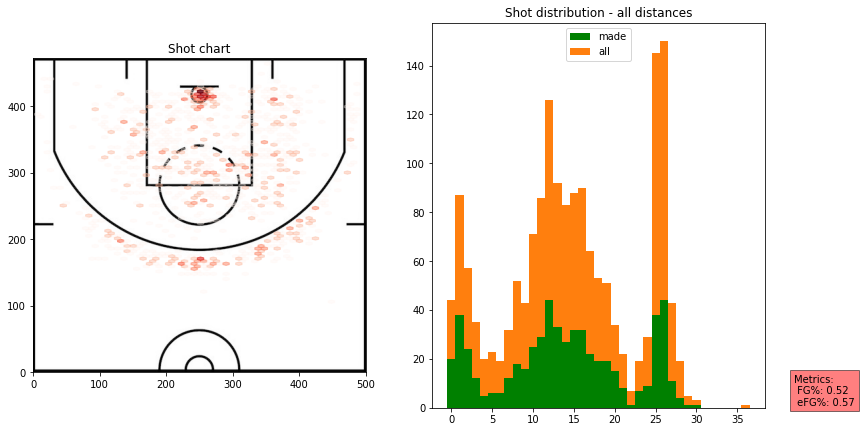

In [ ]:
player_shots.plot_shots()

In [ ]:
player_shots = PlayerShots(shots_2021,"Russell Westbrook")

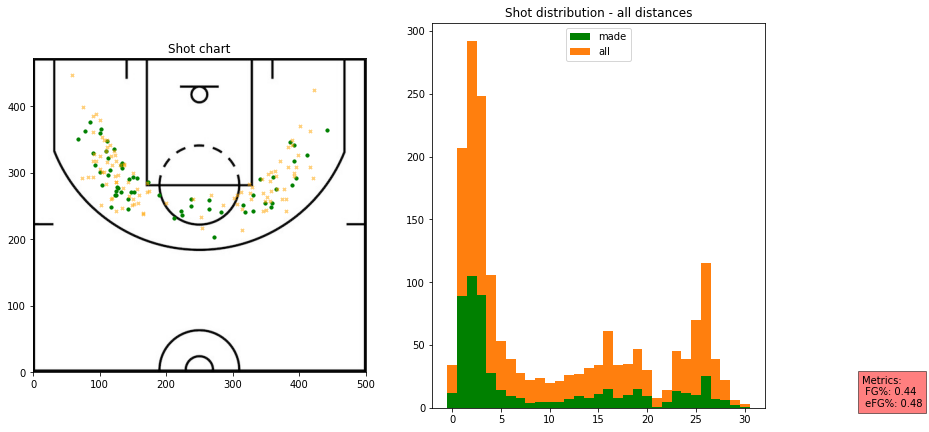

In [ ]:
player_shots.plot_shots(distance_limit=(16,26),attempt="2-pointer")

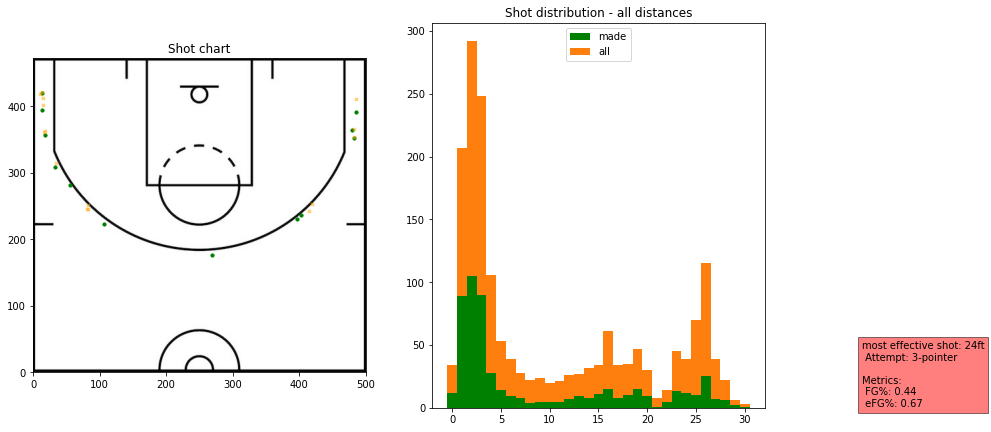

In [ ]:
player_shots.plot_effective(metric="efg", exclude=['0ft','22ft',"1ft"])

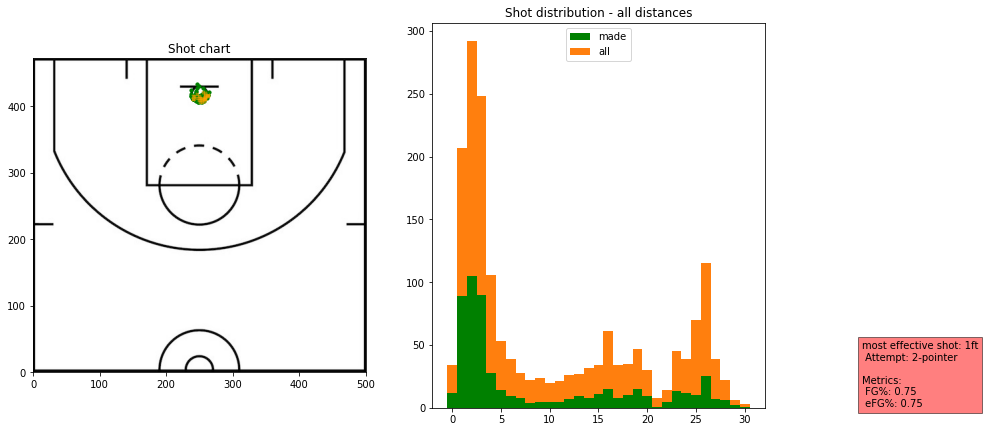

In [ ]:
player_shots.plot_effective(metric="efg", min_shots="auto",exclude=['2ft'])

In [ ]:
player_shots = PlayerShots(shots_2021,"James Harden")

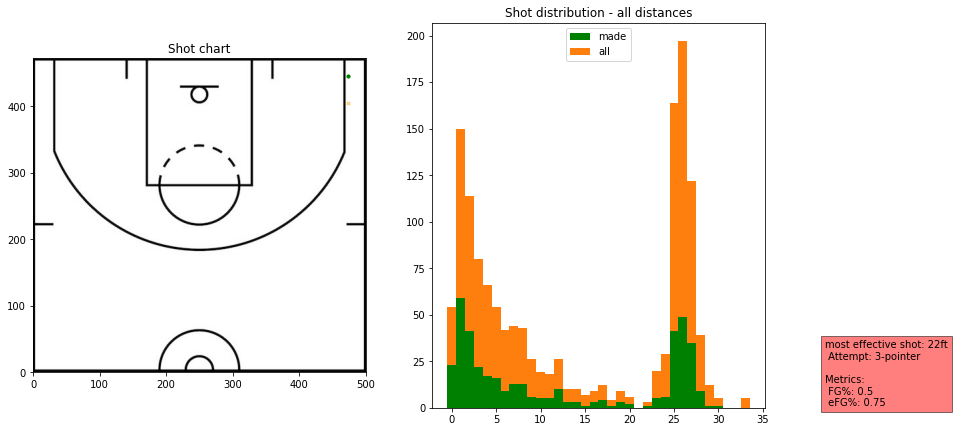

In [ ]:
player_shots.plot_effective(metric="efg", exclude=['16ft',"0ft","11ft",'1ft'])

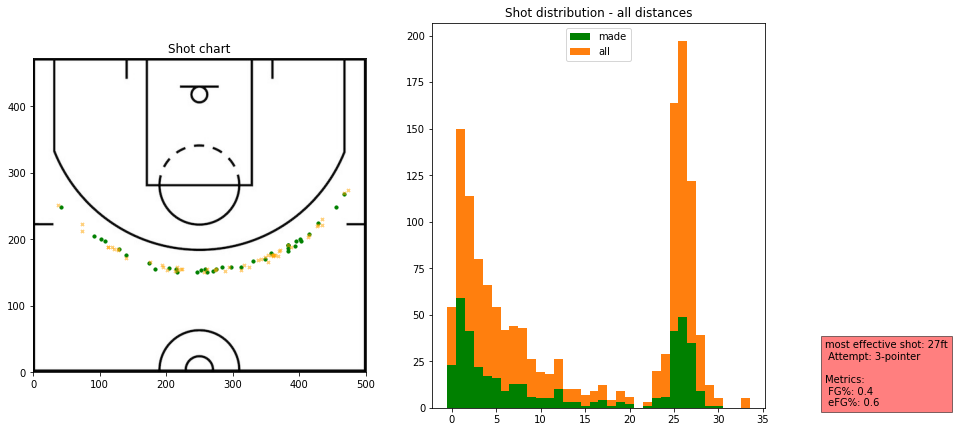

In [ ]:
player_shots.plot_effective(min_shots="auto",exclude=['1ft','28ft','2ft','3ft'])

In [ ]:
player_shots = PlayerShots(shots_2021, 'Paul George')

In [ ]:
player_shots.list_game_ids(2021,11,16)

,game_id,winner,loser
35143,202111160LAC,LA Clippers,San Antonio


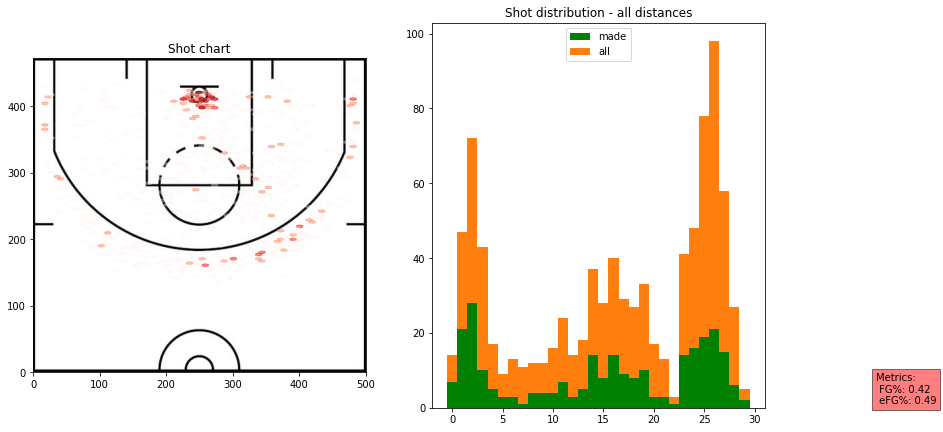

In [ ]:
player_shots.plot_shots()

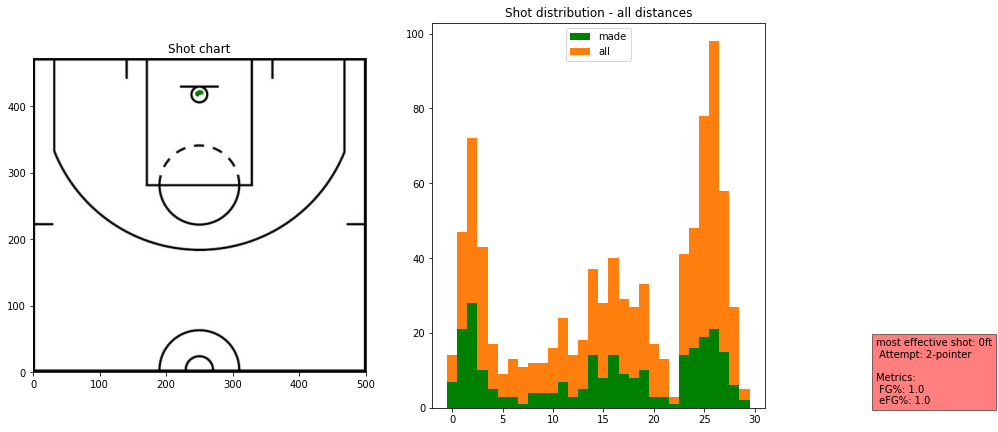

In [ ]:
player_shots.plot_effective()

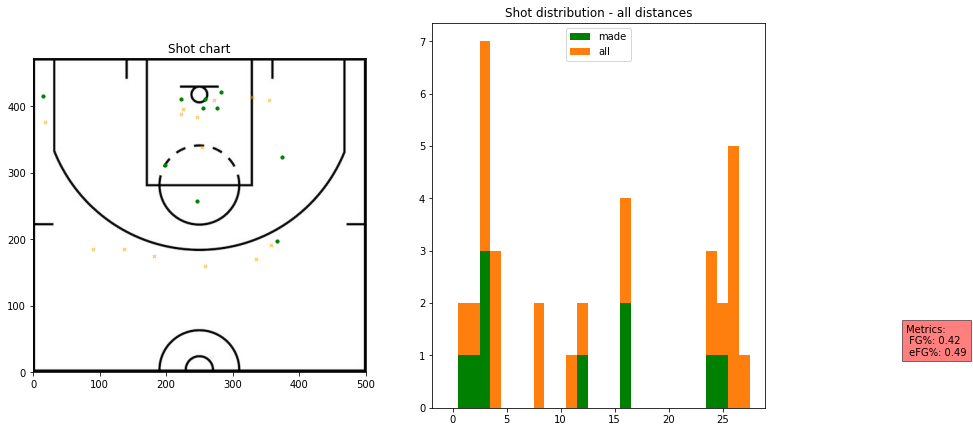

In [ ]:
player_shots.plot_shots(date_range='202111160LAC')